In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load dataset
data = pd.read_csv('file.csv')
# Drop the unnamed column
data = data.drop(columns=['Unnamed: 0'])
data.dropna(inplace = True)

In [3]:
# Convert Transaction_Date to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Quarter'] = data['Transaction_Date'].dt.to_period('Q')

In [4]:
# Latest record in dataset
latest_record_date = data['Transaction_Date'].max()
earliest_record_date = data['Transaction_Date'].min()
print("Latest record date:", latest_record_date)
print("Earliest record date:", earliest_record_date)

Latest record date: 2019-12-31 00:00:00
Earliest record date: 2019-01-01 00:00:00


Given that we have data spanning a single year, we will divide it into four quarters.
- Q1 (First Quarter): January 1st to March 31st
- Q2 (Second Quarter): April 1st to June 30th
- Q3 (Third Quarter): July 1st to September 30th
- Q4 (Fourth Quarter): October 1st to December 31st

In [5]:
# Filter data for 2019Q1
data_2019Q1 = data[data['Quarter'] == '2019Q1']
# Filter data for 2019Q2
data_2019Q2 = data[data['Quarter'] == '2019Q2']
# Filter data for 2019Q3
data_2019Q3 = data[data['Quarter'] == '2019Q3']
# Filter data for 2019Q4
data_2019Q4 = data[data['Quarter'] == '2019Q4']

Last_day_Q1 = pd.to_datetime('2019-3-31')
Last_day_Q2 = pd.to_datetime('2019-6-30')
Last_day_Q3 = pd.to_datetime('2019-9-30')
Last_day_Q4 = pd.to_datetime('2019-12-31')

number_of_days_in_Q1 = (Last_day_Q1 - pd.to_datetime('2019-1-1')).days
number_of_days_in_Q2 = (Last_day_Q2 - pd.to_datetime('2019-4-1')).days
number_of_days_in_Q3 = (Last_day_Q3 - pd.to_datetime('2019-7-1')).days
number_of_days_in_Q4 = (Last_day_Q4 - pd.to_datetime('2019-10-1')).days

In [6]:
data_2019Q1['Day_Since'] = (Last_day_Q1 - data_2019Q1['Transaction_Date']).dt.days
data_2019Q2['Day_Since'] = (Last_day_Q2 - data_2019Q2['Transaction_Date']).dt.days
data_2019Q3['Day_Since'] = (Last_day_Q3 - data_2019Q3['Transaction_Date']).dt.days
data_2019Q4['Day_Since'] = (Last_day_Q4 - data_2019Q4['Transaction_Date']).dt.days

/var/folders/62/grj8ft516czf_wks6812mm0r0000gn/T/ipykernel_27814/2226030959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019Q1['Day_Since'] = (Last_day_Q1 - data_2019Q1['Transaction_Date']).dt.days
/var/folders/62/grj8ft516czf_wks6812mm0r0000gn/T/ipykernel_27814/2226030959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019Q2['Day_Since'] = (Last_day_Q2 - data_2019Q2['Transaction_Date']).dt.days
/var/folders/62/grj8ft516czf_wks6812mm0r0000gn/T/ipykernel_27814/2226030959.py:3: SettingW

In [7]:
# Computing First Purchase, Recency, Frequency, and Monetary (RFM) Analysis (Q1)
firstPurchase_df = data_2019Q1.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Recency
recency_df = data_2019Q1.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = data_2019Q1.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = data_2019Q1.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_Q1 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [8]:
# Computing First Purchase, Recency, Frequency, and Monetary (RFM) Analysis (Q2)
firstPurchase_df = data_2019Q2.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Recency
recency_df = data_2019Q2.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = data_2019Q2.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = data_2019Q2.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_Q2 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [9]:
# Computing First Purchase, Recency, Frequency, and Monetary (RFM) Analysis (Q3)
firstPurchase_df = data_2019Q3.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Recency
recency_df = data_2019Q3.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = data_2019Q3.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = data_2019Q3.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_Q3 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [10]:
# Computing First Purchase, Recency, Frequency, and Monetary (RFM) Analysis (Q4)
firstPurchase_df = data_2019Q4.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Recency
recency_df = data_2019Q4.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = data_2019Q4.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = data_2019Q4.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_Q4 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [11]:
recency_quartiles = rfm_df_Q1['Recency'].quantile([0.25, 0.5, 0.75])
Q1_q1,Q1_q2,Q1_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_Q1 = rfm_df_Q1['Monetary'].mean()

In [12]:
recency_quartiles = rfm_df_Q2['Recency'].quantile([0.25, 0.5, 0.75])
Q2_q1,Q2_q2,Q2_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_Q2 = rfm_df_Q2['Monetary'].mean()

In [13]:
recency_quartiles = rfm_df_Q3['Recency'].quantile([0.25, 0.5, 0.75])
Q3_q1,Q3_q2,Q3_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_Q3 = rfm_df_Q3['Monetary'].mean()

In [14]:
recency_quartiles = rfm_df_Q4['Recency'].quantile([0.25, 0.5, 0.75])
Q4_q1,Q4_q2,Q4_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_Q4 = rfm_df_Q4['Monetary'].mean()

In [15]:
avg_q1 = (Q1_q1 + Q2_q1 + Q3_q1 + Q4_q1) / 4
avg_q2 = (Q1_q2 + Q2_q2 + Q3_q2 + Q4_q2) / 4
avg_q3 = (Q1_q3 + Q2_q3 + Q3_q3 + Q4_q3) / 4

avg_monetary = (mean_monetary_Q1 + mean_monetary_Q2 + mean_monetary_Q3 + mean_monetary_Q4) / 4

In [16]:
# Output quartile values
print("Average Quartiles of Recency:")
print("25th percentile:", avg_q1)
print("50th percentile:", avg_q2)
print("75th percentile:", avg_q3)

# Output mean and median
print("Mean of Monetary:", avg_monetary)

Average Quartiles of Recency:
25th percentile: 18.0
50th percentile: 39.625
75th percentile: 64.1875
Mean of Monetary: 2097.351925695743


In [17]:
# Filter data for quarters until Q2
customers_at_the_end_of_2019Q2 = data[(data['Quarter'] != '2019Q4') & (data['Quarter'] != '2019Q3')].copy()

# Calculate new values for 'Day_Since'
new_day_since = (Last_day_Q2 - customers_at_the_end_of_2019Q2['Transaction_Date']).dt.days

# Use .loc to assign new values to 'Day_Since'
customers_at_the_end_of_2019Q2.loc[:, 'Day_Since'] = new_day_since

In [18]:
firstPurchase_df = customers_at_the_end_of_2019Q2.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Computing Recency, Frequency, and Monetary (RFM) Analysis
# Recency
recency_df = customers_at_the_end_of_2019Q2.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = customers_at_the_end_of_2019Q2.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = customers_at_the_end_of_2019Q2.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_end_of_2019Q2 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [19]:
# Segmentation for Q1

# Define segmentation categories
def segment_customer(recency, monetary, firstPurchase):
    if recency - number_of_days_in_Q1 >0:
        return 'Inactive'
    if recency <= number_of_days_in_Q1 / 3:
        if monetary >= avg_monetary:
            return 'Active_High_Value'
        else:
            return 'Active_Low_Value'
    elif recency <= number_of_days_in_Q1 / 3 * 2:
        if monetary >= avg_monetary:
            return 'Warm_High_Value'
        else:
            return 'Warm_Low_Value'
    else:
        return 'Cold'

# Apply segmentation function to create a new column 'Segment'
rfm_df_Q1['Segment'] = rfm_df_Q1.apply(lambda row: segment_customer(row['Recency'], row['Monetary'], row['First Purchase']), axis=1)

In [20]:
recency_quartiles = rfm_df_end_of_2019Q2['Recency'].quantile([0.25, 0.5, 0.75])
end_of_Q2_q1,end_of_Q2_q2,end_of_Q2_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_end_of_Q2 = rfm_df_end_of_2019Q2['Monetary'].mean()

In [21]:
# Segmentation for Q2

# Define segmentation categories
def segment_customer(recency, monetary, firstPurchase):
    if recency - number_of_days_in_Q2 >0:
        return 'Inactive'
    if firstPurchase <= number_of_days_in_Q2:
        return 'New Active'
    if recency <= number_of_days_in_Q2 / 3:
        if monetary >= avg_monetary:
            return 'Active_High_Value'
        else:
            return 'Active_Low_Value'
    elif recency <= number_of_days_in_Q2 / 3 * 2:
        if monetary >= avg_monetary:
            return 'Warm_High_Value'
        else:
            return 'Warm_Low_Value'
    else:
        return 'Cold'

# Apply segmentation function to create a new column 'Segment'
rfm_df_end_of_2019Q2['Segment'] = rfm_df_end_of_2019Q2.apply(lambda row: segment_customer(row['Recency'], row['Monetary'], row['First Purchase']), axis=1)

In [22]:
# Get unique segments at the end of 2019Q1 and 2019Q2
segments_end_of_2019Q1 = rfm_df_Q1['Segment'].unique()
segments_end_of_2019Q2 = rfm_df_end_of_2019Q2['Segment'].unique()

# Initialize transition matrix with zeros
transition_matrix_q2 = pd.DataFrame(np.zeros((len(segments_end_of_2019Q1), len(segments_end_of_2019Q2))), index=segments_end_of_2019Q1, columns=segments_end_of_2019Q2)

In [23]:
# Iterate over customers and count transitions
for _, customer in rfm_df_Q1.iterrows():
    prev_segment = customer['Segment']
    curr_segment = rfm_df_end_of_2019Q2.loc[rfm_df_end_of_2019Q2['CustomerID'] == customer['CustomerID'], 'Segment'].iloc[0]
    transition_matrix_q2.loc[prev_segment, curr_segment] += 1

# Normalize transition matrix to obtain transition probabilities
transition_matrix_q2 = transition_matrix_q2.div(transition_matrix_q2.sum(axis=1), axis=0)
transition_matrix_q2.fillna(0, inplace=True)
transition_matrix_q2

,Inactive,New Active,Active_Low_Value,Active_High_Value,Cold,Warm_Low_Value,Warm_High_Value
Active_High_Value,0.608696,0.0,0.000000,0.260870,0.028986,0.000000,0.101449
Active_Low_Value,0.634328,0.0,0.111940,0.052239,0.074627,0.104478,0.022388
Warm_Low_Value,0.579710,0.0,0.130435,0.101449,0.057971,0.072464,0.057971
Cold,0.672619,0.0,0.065476,0.101190,0.095238,0.035714,0.029762
Warm_High_Value,0.687500,0.0,0.000000,0.104167,0.083333,0.000000,0.125000


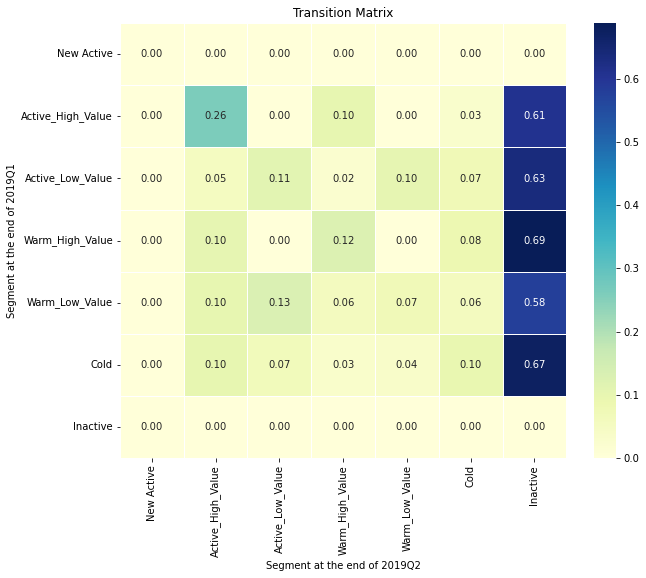

In [24]:
# Define the sequence of segments
segment_sequence = ['New Active', 'Active_High_Value', 'Active_Low_Value', 'Warm_High_Value', 'Warm_Low_Value', 'Cold', 'Inactive']

# Reorder the transition matrix according to the sequence
transition_matrix_q2 = transition_matrix_q2.reindex(segment_sequence, axis=0)
transition_matrix_q2 = transition_matrix_q2.reindex(segment_sequence, axis=1)
transition_matrix_q2.fillna(0, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix_q2, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Transition Matrix')
plt.xlabel('Segment at the end of 2019Q2')
plt.ylabel('Segment at the end of 2019Q1')
plt.show()

In [25]:
# Filter data for quarters until Q3
customers_at_the_end_of_2019Q3 = data[data['Quarter'] != '2019Q4'].copy()

# Calculate new values for 'Day_Since'
new_day_since = (Last_day_Q3 - customers_at_the_end_of_2019Q3['Transaction_Date']).dt.days

# Use .loc to assign new values to 'Day_Since'
customers_at_the_end_of_2019Q3.loc[:, 'Day_Since'] = new_day_since

In [26]:
firstPurchase_df = customers_at_the_end_of_2019Q3.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Computing Recency, Frequency, and Monetary (RFM) Analysis
# Recency
recency_df = customers_at_the_end_of_2019Q3.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = customers_at_the_end_of_2019Q3.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = customers_at_the_end_of_2019Q3.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_end_of_2019Q3 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [27]:
recency_quartiles = rfm_df_end_of_2019Q3['Recency'].quantile([0.25, 0.5, 0.75])
end_of_Q3_q1,end_of_Q3_q2,end_of_Q3_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_end_of_Q3 = rfm_df_end_of_2019Q3['Monetary'].mean()

In [28]:
# Segmentation for Q3

# Define segmentation categories
def segment_customer(recency, monetary, firstPurchase):
    if recency - number_of_days_in_Q3 >0:
        return 'Inactive'
    if firstPurchase <= number_of_days_in_Q3:
        return 'New Active'
    if recency <= number_of_days_in_Q3 / 3:
        if monetary >= avg_monetary:
            return 'Active_High_Value'
        else:
            return 'Active_Low_Value'
    elif recency <= number_of_days_in_Q3 / 3 * 2:
        if monetary >= avg_monetary:
            return 'Warm_High_Value'
        else:
            return 'Warm_Low_Value'
    else:
        return 'Cold'

# Apply segmentation function to create a new column 'Segment'
rfm_df_end_of_2019Q3['Segment'] = rfm_df_end_of_2019Q3.apply(lambda row: segment_customer(row['Recency'], row['Monetary'], row['First Purchase']), axis=1)

In [29]:
# Get unique segments at the end of 2019Q2 and 2019Q3
segments_end_of_2019Q2 = rfm_df_end_of_2019Q2['Segment'].unique()
segments_end_of_2019Q3 = rfm_df_end_of_2019Q3['Segment'].unique()

# Initialize transition matrix with zeros
transition_matrix_q3 = pd.DataFrame(np.zeros((len(segments_end_of_2019Q2), len(segments_end_of_2019Q3))), index=segments_end_of_2019Q2, columns=segments_end_of_2019Q3)

In [30]:
# Iterate over customers and count transitions
for _, customer in rfm_df_end_of_2019Q2.iterrows():
    prev_segment = customer['Segment']
    curr_segment = rfm_df_end_of_2019Q3.loc[rfm_df_end_of_2019Q3['CustomerID'] == customer['CustomerID'], 'Segment'].iloc[0]
    transition_matrix_q3.loc[prev_segment, curr_segment] += 1

# Normalize transition matrix to obtain transition probabilities
transition_matrix_q3 = transition_matrix_q3.div(transition_matrix_q3.sum(axis=1), axis=0)

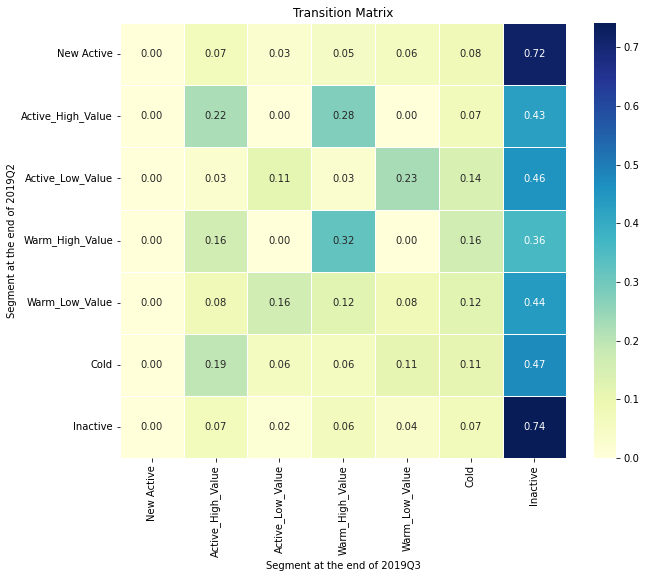

In [31]:
# Define the sequence of segments
segment_sequence = ['New Active', 'Active_High_Value', 'Active_Low_Value', 'Warm_High_Value', 'Warm_Low_Value', 'Cold', 'Inactive']

# Reorder the transition matrix according to the sequence
transition_matrix_q3 = transition_matrix_q3.reindex(segment_sequence, axis=0)
transition_matrix_q3 = transition_matrix_q3.reindex(segment_sequence, axis=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix_q3, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Transition Matrix')
plt.xlabel('Segment at the end of 2019Q3')
plt.ylabel('Segment at the end of 2019Q2')
plt.show()

In [32]:
# Filter data for quarters until Q4
customers_at_the_end_of_2019Q4 = data.copy()

# Calculate new values for 'Day_Since'
new_day_since = (Last_day_Q4 - customers_at_the_end_of_2019Q4['Transaction_Date']).dt.days

# Use .loc to assign new values to 'Day_Since'
customers_at_the_end_of_2019Q4.loc[:, 'Day_Since'] = new_day_since

In [33]:
firstPurchase_df = customers_at_the_end_of_2019Q4.groupby('CustomerID')['Day_Since'].max().reset_index()
firstPurchase_df.columns = ['CustomerID', 'First Purchase']

# Computing Recency, Frequency, and Monetary (RFM) Analysis
# Recency
recency_df = customers_at_the_end_of_2019Q4.groupby('CustomerID')['Day_Since'].min().reset_index()
recency_df.columns = ['CustomerID', 'Recency']

# Frequency
frequency_df = customers_at_the_end_of_2019Q4.groupby('CustomerID')['Transaction_Date'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Compute the total monetary value for each customer
monetary_df = customers_at_the_end_of_2019Q4.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['Avg_Price']).sum()).reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM values
rfm_df_end_of_2019Q4 = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').merge(firstPurchase_df, on='CustomerID')

In [34]:
recency_quartiles = rfm_df_end_of_2019Q4['Recency'].quantile([0.25, 0.5, 0.75])
end_of_Q4_q1,end_of_Q4_q2,end_of_Q4_q3 = recency_quartiles[0.25], recency_quartiles[0.5], recency_quartiles[0.75]

# Calculate mean and median
mean_monetary_end_of_Q4 = rfm_df_end_of_2019Q4['Monetary'].mean()

In [35]:
# Segmentation for Q4

# Define segmentation categories
def segment_customer(recency, monetary, firstPurchase):
    if recency - number_of_days_in_Q4 >0:
        return 'Inactive'
    if firstPurchase <= number_of_days_in_Q4:
        return 'New Active'
    if recency <= number_of_days_in_Q4 / 3:
        if monetary >= avg_monetary:
            return 'Active_High_Value'
        else:
            return 'Active_Low_Value'
    elif recency <= number_of_days_in_Q4 / 3 * 2:
        if monetary >= avg_monetary:
            return 'Warm_High_Value'
        else:
            return 'Warm_Low_Value'
    else:
        return 'Cold'

# Apply segmentation function to create a new column 'Segment'
rfm_df_end_of_2019Q4['Segment'] = rfm_df_end_of_2019Q4.apply(lambda row: segment_customer(row['Recency'], row['Monetary'], row['First Purchase']), axis=1)

In [36]:
# Get unique segments at the end of 2019Q3 and 2019Q4
segments_end_of_2019Q3 = rfm_df_end_of_2019Q3['Segment'].unique()
segments_end_of_2019Q4 = rfm_df_end_of_2019Q4['Segment'].unique()

# Initialize transition matrix with zeros
transition_matrix = pd.DataFrame(np.zeros((len(segments_end_of_2019Q3), len(segments_end_of_2019Q4))), index=segments_end_of_2019Q3, columns=segments_end_of_2019Q4)

In [37]:
# Iterate over customers and count transitions
for _, customer in rfm_df_end_of_2019Q3.iterrows():
    prev_segment = customer['Segment']
    curr_segment = rfm_df_end_of_2019Q4.loc[rfm_df_end_of_2019Q4['CustomerID'] == customer['CustomerID'], 'Segment'].iloc[0]
    transition_matrix.loc[prev_segment, curr_segment] += 1

# Normalize transition matrix to obtain transition probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
transition_matrix

,Inactive,Warm_High_Value,Cold,New Active,Active_High_Value,Active_Low_Value,Warm_Low_Value
New Active,0.807818,0.042345,0.065147,0.0,0.039088,0.022801,0.022801
Inactive,0.829470,0.052980,0.057947,0.0,0.033113,0.019868,0.006623
Cold,0.680000,0.066667,0.093333,0.0,0.146667,0.013333,0.000000
Warm_Low_Value,0.580000,0.020000,0.100000,0.0,0.120000,0.140000,0.040000
Warm_High_Value,0.442857,0.242857,0.042857,0.0,0.271429,0.000000,0.000000
Active_High_Value,0.546667,0.133333,0.080000,0.0,0.240000,0.000000,0.000000
Active_Low_Value,0.653846,0.000000,0.038462,0.0,0.153846,0.076923,0.076923


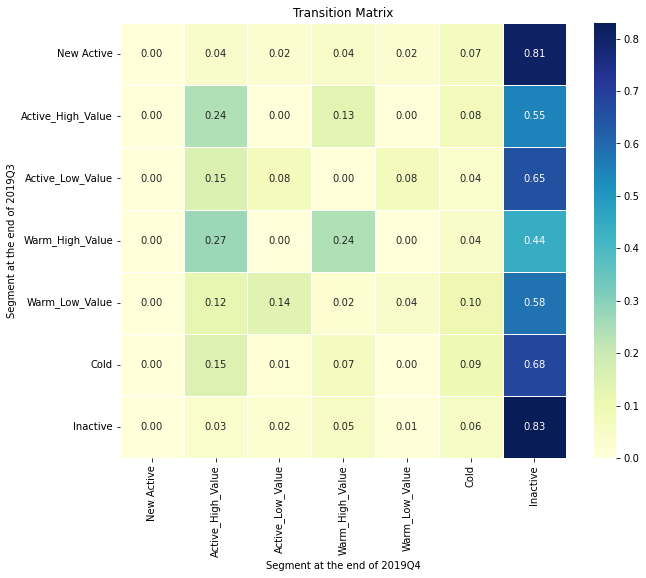

In [38]:
# Define the sequence of segments
segment_sequence = ['New Active', 'Active_High_Value', 'Active_Low_Value', 'Warm_High_Value', 'Warm_Low_Value', 'Cold', 'Inactive']

# Reorder the transition matrix according to the sequence
transition_matrix = transition_matrix.reindex(segment_sequence, axis=0)
transition_matrix = transition_matrix.reindex(segment_sequence, axis=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Transition Matrix')
plt.xlabel('Segment at the end of 2019Q4')
plt.ylabel('Segment at the end of 2019Q3')
plt.show()

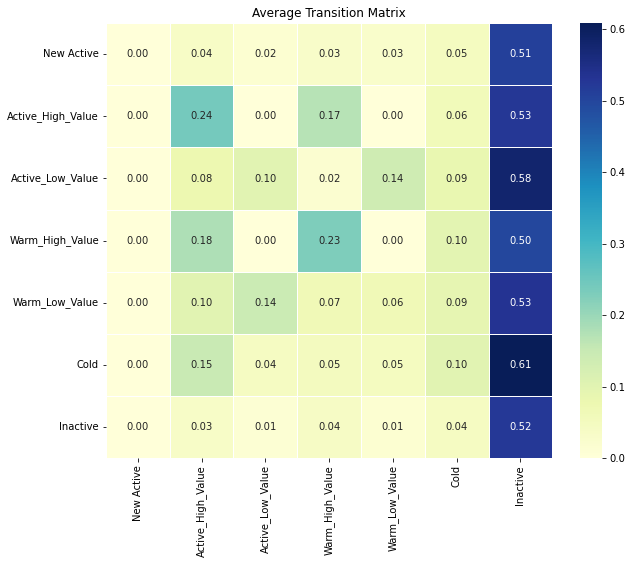

In [39]:
# Concatenate the three matrices along a new axis (axis=0) to stack them
all_transition_matrices = transition_matrix + transition_matrix_q2 + transition_matrix_q3

# Compute the mean along the new axis (axis=0) to get the average transition matrix
average_transition_matrix = all_transition_matrices / 3
# Define the sequence of segments
segment_sequence = ['New Active', 'Active_High_Value', 'Active_Low_Value', 'Warm_High_Value', 'Warm_Low_Value', 'Cold', 'Inactive']

# Reorder the transition matrix according to the sequence
average_transition_matrix = average_transition_matrix.reindex(segment_sequence, axis=0)
average_transition_matrix = average_transition_matrix.reindex(segment_sequence, axis=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_transition_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Average Transition Matrix')
plt.show()

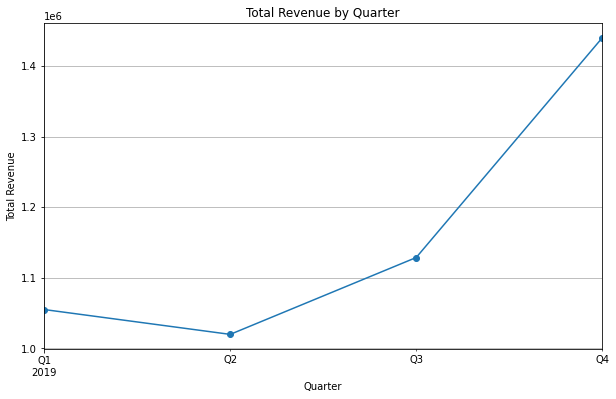

In [40]:
# Assuming you have the 'Quantity' and 'Avg_Price' columns in your DataFrame
data['Revenue'] = data['Quantity'] * data['Avg_Price']

# Group by Quarter and sum the revenue
revenue_by_quarter = data.groupby('Quarter')['Revenue'].sum()
# Assuming you already have revenue_by_quarter calculated
revenue_by_quarter.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [41]:
# Calculate total count of customers per segment
customers_per_segment = rfm_df_end_of_2019Q4.groupby('Segment').size().to_dict()
customers_per_segment

{'Active_High_Value': 90,
 'Active_Low_Value': 29,
 'Cold': 77,
 'Inactive': 918,
 'New Active': 261,
 'Warm_High_Value': 78,
 'Warm_Low_Value': 15}

In [42]:
# Define the number of time steps for the simulation
num_time_steps = 5  # Adjust as needed

# Initialize a dictionary to store the count of customers in each segment at each time step
simulation_results = {segment: [customers_per_segment[segment]] for segment in customers_per_segment}

# Perform the simulation
for t in range(1, num_time_steps):
    # Initialize an empty dictionary to store the count of customers in each segment after the current time step
    new_counts = {}
    
    # Iterate over segments
    for from_segment in average_transition_matrix.index:
        # Calculate the number of customers transitioning from the current segment to each other segment
        transitions = np.random.multinomial(simulation_results[from_segment][-1], average_transition_matrix.loc[from_segment].values)
        
        # Update the count of customers in each segment after the transition
        for i, to_segment in enumerate(average_transition_matrix.columns):
            if to_segment in new_counts:
                new_counts[to_segment] += transitions[i]
            else:
                new_counts[to_segment] = transitions[i]
    
    # Append the count of customers in each segment after the current time step to the simulation results
    for segment in customers_per_segment.keys():
        simulation_results[segment].append(new_counts.get(segment, 0))

# Convert the simulation results to a DataFrame for easier analysis and visualization
simulation_df = pd.DataFrame(simulation_results)

# Reorder the columns based on the segment_sequence list
simulation_df = simulation_df.reindex(columns=segment_sequence)

# Create a list of quarter periods
quarters = ['2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4']

# Replace the index of the simulation_df DataFrame with the quarters list
simulation_df.index = pd.PeriodIndex(quarters, freq='Q')

simulation_df

,New Active,Active_High_Value,Active_Low_Value,Warm_High_Value,Warm_Low_Value,Cold,Inactive
2019Q4,261,90,29,78,15,77,918
2020Q1,0,95,25,83,33,89,1143
2020Q2,0,94,24,82,27,90,1151
2020Q3,0,92,28,84,21,69,1174
2020Q4,0,83,25,83,29,88,1160


In [43]:

data_Q1 = data[data['Quarter']=='2019Q1']
merged_data_Q1 = data_Q1.merge(rfm_df_Q1[['CustomerID', 'Segment']], on='CustomerID', how='left')
revenue_by_segment_Q1 = merged_data_Q1.groupby('Segment')['Revenue'].sum()
customers_per_segment_Q1 = rfm_df_Q1.groupby('Segment').size()

# Calculate average revenue per customer for each segment
average_revenue_per_customer_q1 = revenue_by_segment_Q1 / customers_per_segment_Q1
average_revenue_per_customer_q1
# Add a new segment 'New Active' with a value of 0
average_revenue_per_customer_q1.loc['New Active'] = 0

data_Q2 = data[data['Quarter']=='2019Q2']
merged_data_Q2 = data_Q2.merge(rfm_df_end_of_2019Q2[['CustomerID', 'Segment']], on='CustomerID', how='left')
revenue_by_segment_Q2 = merged_data_Q2.groupby('Segment')['Revenue'].sum()
customers_per_segment_Q2 = rfm_df_end_of_2019Q2.groupby('Segment').size()

# Calculate average revenue per customer for each segment
average_revenue_per_customer_q2 = revenue_by_segment_Q2 / customers_per_segment_Q2

data_Q3 = data[data['Quarter']=='2019Q3']
merged_data_Q3 = data_Q3.merge(rfm_df_end_of_2019Q3[['CustomerID', 'Segment']], on='CustomerID', how='left')
revenue_by_segment_Q3 = merged_data_Q3.groupby('Segment')['Revenue'].sum()
customers_per_segment_Q3 = rfm_df_end_of_2019Q3.groupby('Segment').size()

# Calculate average revenue per customer for each segment
average_revenue_per_customer_q3 = revenue_by_segment_Q3 / customers_per_segment_Q3

data_Q4 = data[data['Quarter']=='2019Q4']
merged_data_Q4 = data_Q4.merge(rfm_df_end_of_2019Q4[['CustomerID', 'Segment']], on='CustomerID', how='left')
revenue_by_segment_Q4 = merged_data_Q4.groupby('Segment')['Revenue'].sum()
customers_per_segment_Q4 = rfm_df_end_of_2019Q4.groupby('Segment').size()

# Calculate average revenue per customer for each segment
average_revenue_per_customer_q4 = revenue_by_segment_Q4 / customers_per_segment_Q4

average_revenue_per_customer = (average_revenue_per_customer_q1 + average_revenue_per_customer_q2 + average_revenue_per_customer_q3 + average_revenue_per_customer_q4) / 4

print(average_revenue_per_customer)

Segment
Active_High_Value    4196.802954
Active_Low_Value      582.604094
Cold                 1427.161108
Inactive                     NaN
New Active           1491.268593
Warm_High_Value      3479.114712
Warm_Low_Value        558.765404
dtype: float64


In [44]:
# Provided average revenue per segment
average_revenue_per_segment = {
    'Active_High_Value': 4196.802954,
    'Active_Low_Value': 582.604094,
    'New Active': 1491.268593,
    'Warm_High_Value': 3479.114712,
    'Warm_Low_Value': 558.765404,
    'Cold':1427.161108,
    'Inactive': 0  
}

# Calculate gross margin for each segment at each time step
gross_margin = simulation_df.copy()  # Create a copy of simulation_df to store gross margin

for segment in segment_sequence:
    gross_margin[segment] *= average_revenue_per_segment[segment]

# Sum gross margin across all segments at each time step
gross_margin['Gross Margin in Each Quarter'] = gross_margin.sum(axis=1)

gross_margin

,New Active,Active_High_Value,Active_Low_Value,Warm_High_Value,Warm_Low_Value,Cold,Inactive,Gross Margin in Each Quarter
2019Q4,389221.102773,377712.265860,16895.518726,271370.947536,8381.481060,109891.405316,0,1.173473e+06
2020Q1,0.000000,398696.280630,14565.102350,288766.521096,18439.258332,127017.338612,0,8.474845e+05
2020Q2,0.000000,394499.477676,13982.498256,285287.406384,15086.665908,128444.499720,0,8.373005e+05
2020Q3,0.000000,386105.871768,16312.914632,292245.635808,11734.073484,98474.116452,0,8.048726e+05
2020Q4,0.000000,348334.645182,14565.102350,288766.521096,16204.196716,125590.177504,0,7.934606e+05


In [45]:
gross_margin = gross_margin[1:5]
# Define the discount rate
discount_rate = 0.15  # Example discount rate of 10%

# Apply discount to the total gross margin values
gross_margin['Discounted Net Margin'] = gross_margin['Gross Margin in Each Quarter'] * (1 - discount_rate)

# Calculate the cumulative net margin
gross_margin['Cumulative Net Margin'] = gross_margin['Discounted Net Margin'].cumsum()

# Select the desired columns
net_margin_df = gross_margin[['Gross Margin in Each Quarter', 'Discounted Net Margin', 'Cumulative Net Margin']]

# Output the DataFrame
net_margin_df

/var/folders/62/grj8ft516czf_wks6812mm0r0000gn/T/ipykernel_27814/3289100892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_margin['Discounted Net Margin'] = gross_margin['Gross Margin in Each Quarter'] * (1 - discount_rate)
/var/folders/62/grj8ft516czf_wks6812mm0r0000gn/T/ipykernel_27814/3289100892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_margin['Cumulative Net Margin'] = gross_margin['Discounted Net Margin'].cumsum()


,Gross Margin in Each Quarter,Discounted Net Margin,Cumulative Net Margin
2020Q1,847484.501020,720361.825867,7.203618e+05
2020Q2,837300.547944,711705.465752,1.432067e+06
2020Q3,804872.612144,684141.720322,2.116209e+06
2020Q4,793460.642848,674441.546421,2.790651e+06


In [46]:
revenue_2019 = data['Revenue'].sum()
revenue_2019

4643625.49

In [53]:
print(2790651/4643625.49 *100)

60.09638387095683


In [48]:
# Assuming 'customer_id' is the common column in both DataFrames
data_Q4 = data[(data['Quarter'] == '2019Q4') & ((data['Coupon_Status'] == 'Used') | (data['Coupon_Status'] == 'Clicked'))]
merged_data_Q4 = data_Q4.merge(rfm_df_end_of_2019Q4[['CustomerID', 'Segment']], on='CustomerID', how='left')
revenue_by_segment_Q4 = merged_data_Q4.groupby('Segment')['Discount_pct'].mean()
revenue_by_segment_Q4

Segment
Active_High_Value    26.019709
Active_Low_Value     28.540541
Cold                 10.000000
New Active           20.131329
Warm_High_Value      18.870491
Warm_Low_Value       18.947368
Name: Discount_pct, dtype: float64

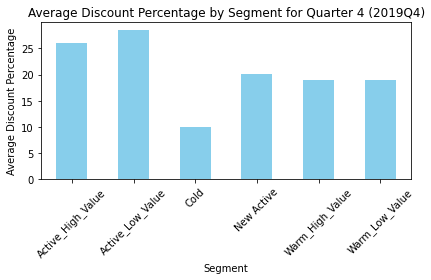

In [49]:
revenue_by_segment_Q4.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Average Discount Percentage by Segment for Quarter 4 (2019Q4)')
plt.xlabel('Segment')
plt.ylabel('Average Discount Percentage')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [50]:
# Group by Quarter and calculate the mean discount percentage
data_coupon_used = data[data['Coupon_Status']=='Used']
average_discount_used_by_quarter = data_coupon_used.groupby('Quarter')['Discount_pct'].mean()
average_discount_used_by_quarter

Quarter
2019Q1    20.224949
2019Q2    19.986037
2019Q3    19.517709
2019Q4    20.201831
Freq: Q-DEC, Name: Discount_pct, dtype: float64

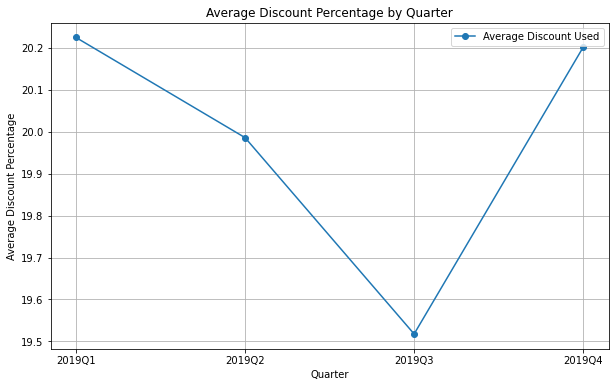

In [51]:
x_labels = average_discount_used_by_quarter.index.astype(str)

plt.figure(figsize=(10, 6))

# Plot average discount used by quarter
plt.plot(x_labels, average_discount_used_by_quarter.values, marker='o', label='Average Discount Used')

plt.title('Average Discount Percentage by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Discount Percentage')
plt.legend()
plt.grid(True)
plt.show()

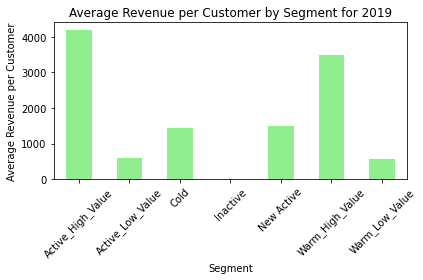

In [52]:
# Plotting the bar chart
average_revenue_per_customer.plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.title('Average Revenue per Customer by Segment for 2019')
plt.xlabel('Segment')
plt.ylabel('Average Revenue per Customer')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()